# Data Science, AI & ML Job Salaries in 2025

## Life Cycle of Machine Learning Project

- Understanding the Problem
- Data Collection
- Data Cleaning and Processing
- Exploratory Data Analysis
- Feature Engineering and Selection
- Model Selection
- Model Training
- Model Evaluation and Tunning
- Model Deployment
- Model Monitoring and Maintenance

### About

What are data science professionals really earning in 2025?

This dataset offers a comprehensive look into global salary trends for roles in Data Science, Machine Learning, and Artificial Intelligence. Carefully curated using a combination of market research and publicly available data sources—including the AIJobs salary survey (CC0 license), 365DataScience, Payscale, KDnuggets, ZipRecruiter, and others—this dataset reflects real-world compensation patterns from around the globe.


### 1 ) Understanding the Problem
 In this project we are going to use the data given to build a Classification model.

Why This Dataset Matters

* Salary prediction and ML modeling
* Global market benchmarking
* Career decision-making and negotiation
* Remote work trend analysis
* Business intelligence dashboards and visualizations


### 2 ) Data Collection

This dataset was collected from the Kaggle: https://www.kaggle.com/datasets/adilshamim8/salaries-for-data-science-jobs/data. 

Carefully curated using a combination of market research and publicly available data sources—including the AIJobs salary survey (CC0 license), 365DataScience, Payscale, KDnuggets, ZipRecruiter, and others—this dataset reflects real-world compensation patterns from around the globe.

#### Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn, and Warings Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # For interactive plots
import math

import warnings # Suppress warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv(r"salaries.csv") # Import the CSV Data as Pandas DataFrame

#### Show top 5 records

In [4]:
df.head() # Show top 5 records

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M


#### Shape of the Dataset

In [5]:
df.shape

(136757, 11)

#### Summary of the Dataset

In [6]:
# Display summary statistics for a dataframe
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,136757.000000,1.367570e+05,136757.000000,136757.000000
mean,2024.374686,1.630432e+05,157490.722756,20.909716
std,0.679644,2.150435e+05,74173.546839,40.594326
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105900.000000,0.000000
50%,2024.000000,1.470000e+05,146000.000000,0.000000
75%,2025.000000,1.988000e+05,197800.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


#### Check Data types in Dataset

In [7]:
# check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136757 entries, 0 to 136756
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           136757 non-null  int64 
 1   experience_level    136757 non-null  object
 2   employment_type     136757 non-null  object
 3   job_title           136757 non-null  object
 4   salary              136757 non-null  int64 
 5   salary_currency     136757 non-null  object
 6   salary_in_usd       136757 non-null  int64 
 7   employee_residence  136757 non-null  object
 8   remote_ratio        136757 non-null  int64 
 9   company_location    136757 non-null  object
 10  company_size        136757 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.5+ MB


### 3 ) Exploring Data

In [8]:
# define numerical and categorical features
numeric_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

# print the columns
print('We have {} numerical features: {}' .format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features: ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

We have 7 categorical features: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


In [9]:
# Proportion of count data on categorical columns
for cols in categorical_features:
    print (df[cols].value_counts(normalize=True) * 100)
    print('----------------------')

experience_level
SE    57.886616
MI    30.318009
EN     9.350161
EX     2.445213
Name: proportion, dtype: float64
----------------------
employment_type
FT    99.413558
CT     0.298339
PT     0.276403
FL     0.011700
Name: proportion, dtype: float64
----------------------
job_title
Data Scientist                      12.850531
Software Engineer                   11.236719
Data Engineer                       11.053913
Data Analyst                         9.252177
Engineer                             7.123584
                                      ...    
Controls Engineer                    0.000731
AI Software Development Engineer     0.000731
AI Engineering Lead                  0.000731
Advanced Data Analyst                0.000731
LLM Engineer                         0.000731
Name: proportion, Length: 398, dtype: float64
----------------------
salary_currency
USD    94.591136
GBP     2.691636
EUR     1.961143
CAD     0.413142
INR     0.101640
PLN     0.070198
CHF     0.033636
AUD    

### Univariate Analysis

To understand the distribution of values for a single variable.

Other Types:

- Bivariate : The analysis of two variables
- Multivariate : The analysis of two or more variables

#### * Numerical Features

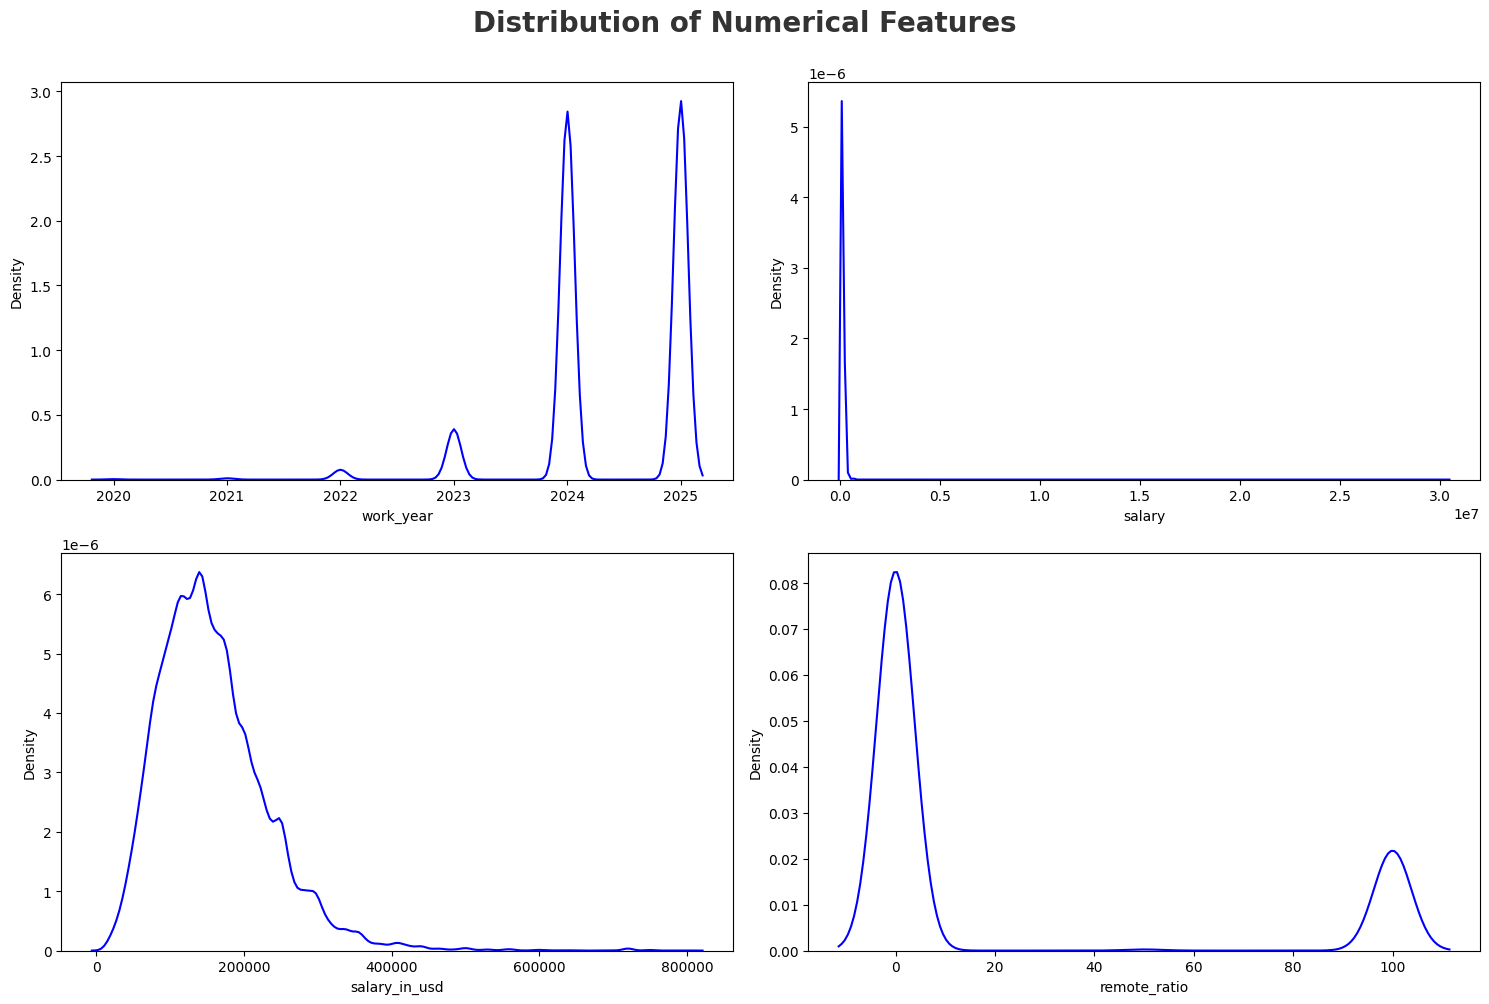

In [10]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

There is only one problem with the plots above, they seemed to be skewed.

#### * Categorical Features

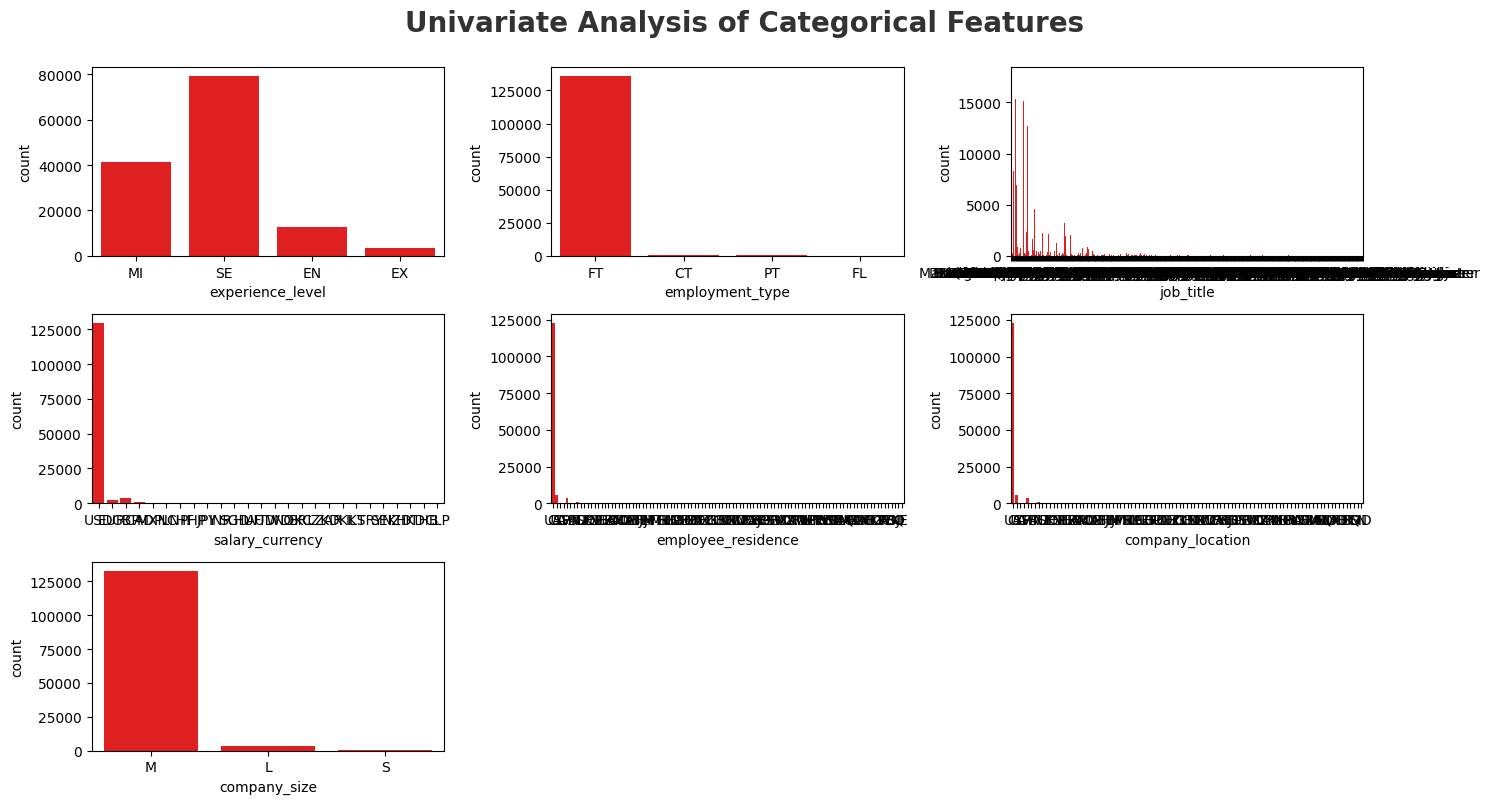

In [11]:
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]], color='red')
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

#### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable

In [12]:
discrete_features = [feature for feature in numeric_features if len (df[feature].unique()) <= 25]
continuous_features = [feature for feature in numeric_features if len (df[feature].unique()) > 25]

# Print the discrete and continuous features
print('We have {} discrete_features: {}' .format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features: {}'.format(len(continuous_features), continuous_features))

# Or
# print(f'We have {len(discrete_features)} discrete_features: {discrete_features}')
# print(f'\nWe have {len(continuous_features)} continuous_features: {continuous_features}')

We have 2 discrete_features: ['work_year', 'remote_ratio']

We have 2 continuous_features: ['salary', 'salary_in_usd']


#### Check Multicollinearity in Numerical Features

In [13]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M


#### Check Multicollinearity in Categorical Features

* A chi-squared test (also chi-square or χ² test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson’s chi-squared test.

* A chi-square statistic is one way to show a relationship between two categorical variables.

* Here we test correlation of categorical columns with the target column, i.e. case_status.

    -   Null Hypothesis (H₀): 
The feature is independent of the target column (no correlation).

    -   Alternative Hypothesis (H₁): 
The feature and target column are not independent (correlated).

In [ ]:
from scipy.stats import chi2_contingency
chi2_Test = []
target_col = 'company_size'  # Change this to your desired target categorical column

for feature in categorical_features:
    if feature == target_col:
        chi2_Test.append('N/A (Target Column)')
        continue
    if chi2_contingency(pd.crosstab(df[target_col], df[feature]))[1] < 0.05:
        chi2_Test.append('Reject Null Hypothesis')
    else:
        chi2_Test.append('Fail to Reject Null Hypothesis')

results = pd.DataFrame({'Column': categorical_features, 'Hypothesis Result': chi2_Test})
results

,Column,Hypothesis Result
0,experience_level,Reject Null Hypothesis
1,employment_type,Reject Null Hypothesis
2,job_title,Reject Null Hypothesis
3,salary_currency,Reject Null Hypothesis
4,employee_residence,Reject Null Hypothesis
5,company_location,Reject Null Hypothesis
6,company_size,N/A (Target Column)


In [21]:
from itertools import combinations
from scipy.stats import chi2_contingency

pairs      = []
chi2_Test  = []

# Loop through every unique pair of categorical features
for col1, col2 in combinations(categorical_features, 2):
    # build contingency table
    ct = pd.crosstab(df[col1], df[col2])
    
    # run chi²
    p_value = chi2_contingency(ct)[1]
    
    # record result
    pairs.append(f"{col1} vs {col2}")
    chi2_Test.append(
        "Reject H₀ (dependent)" 
        if p_value < 0.05 
        else "Fail to reject H₀ (independent)"
    )

# assemble into a DataFrame
results = pd.DataFrame({
    "Feature Pair":   pairs,
    "Hypothesis Test": chi2_Test
})

results

,Feature Pair,Hypothesis Test
0,experience_level vs employment_type,Reject H₀ (dependent)
1,experience_level vs job_title,Reject H₀ (dependent)
2,experience_level vs salary_currency,Reject H₀ (dependent)
3,experience_level vs employee_residence,Reject H₀ (dependent)
4,experience_level vs company_location,Reject H₀ (dependent)
5,experience_level vs company_size,Reject H₀ (dependent)
6,employment_type vs job_title,Reject H₀ (dependent)
7,employment_type vs salary_currency,Reject H₀ (dependent)
8,employment_type vs employee_residence,Reject H₀ (dependent)
9,employment_type vs company_location,Reject H₀ (dependent)


#### Checking Null Values

In [22]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [23]:
continuous_features = [feature for feature in numeric_features if len (df[feature].unique()) >= 10]
print('Number of continuous_features: ', continuous_features)

Number of continuous_features:  ['salary', 'salary_in_usd']


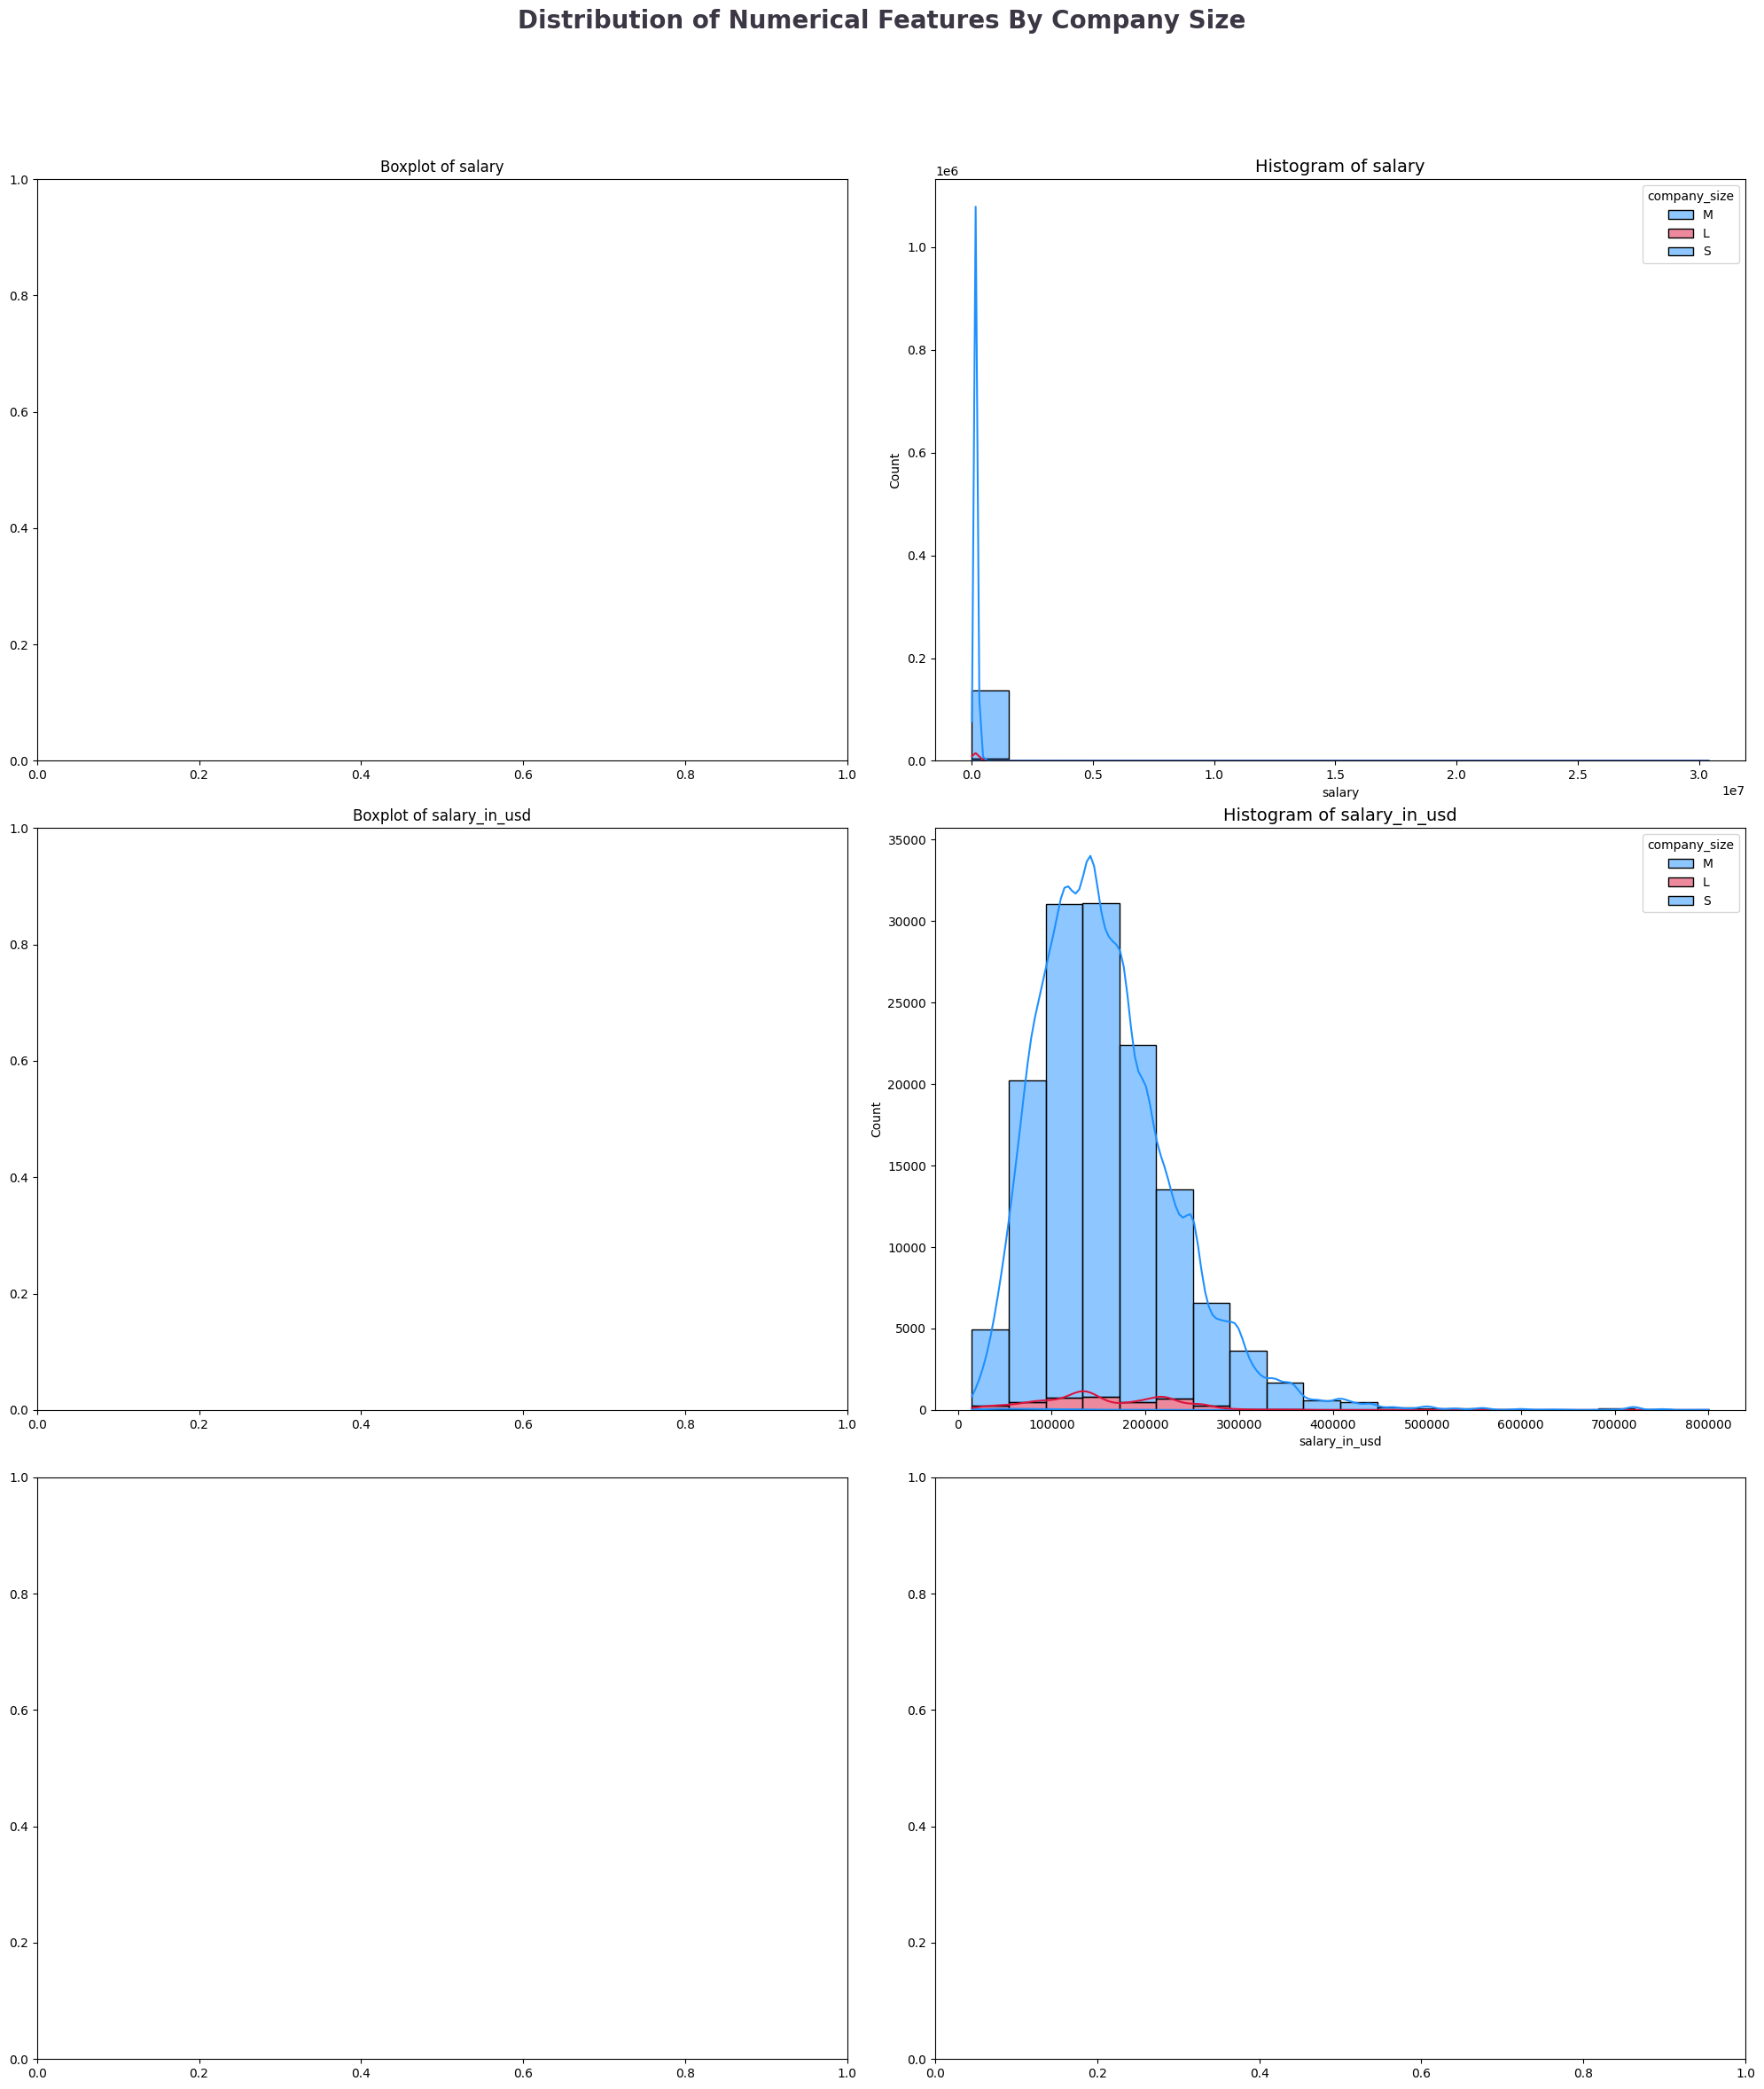

In [25]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(20,24))
fig.suptitle('Distribution of Numerical Features By Company Size', color='#3C3744',
    fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(continuous_features):
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='company_size', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.90)

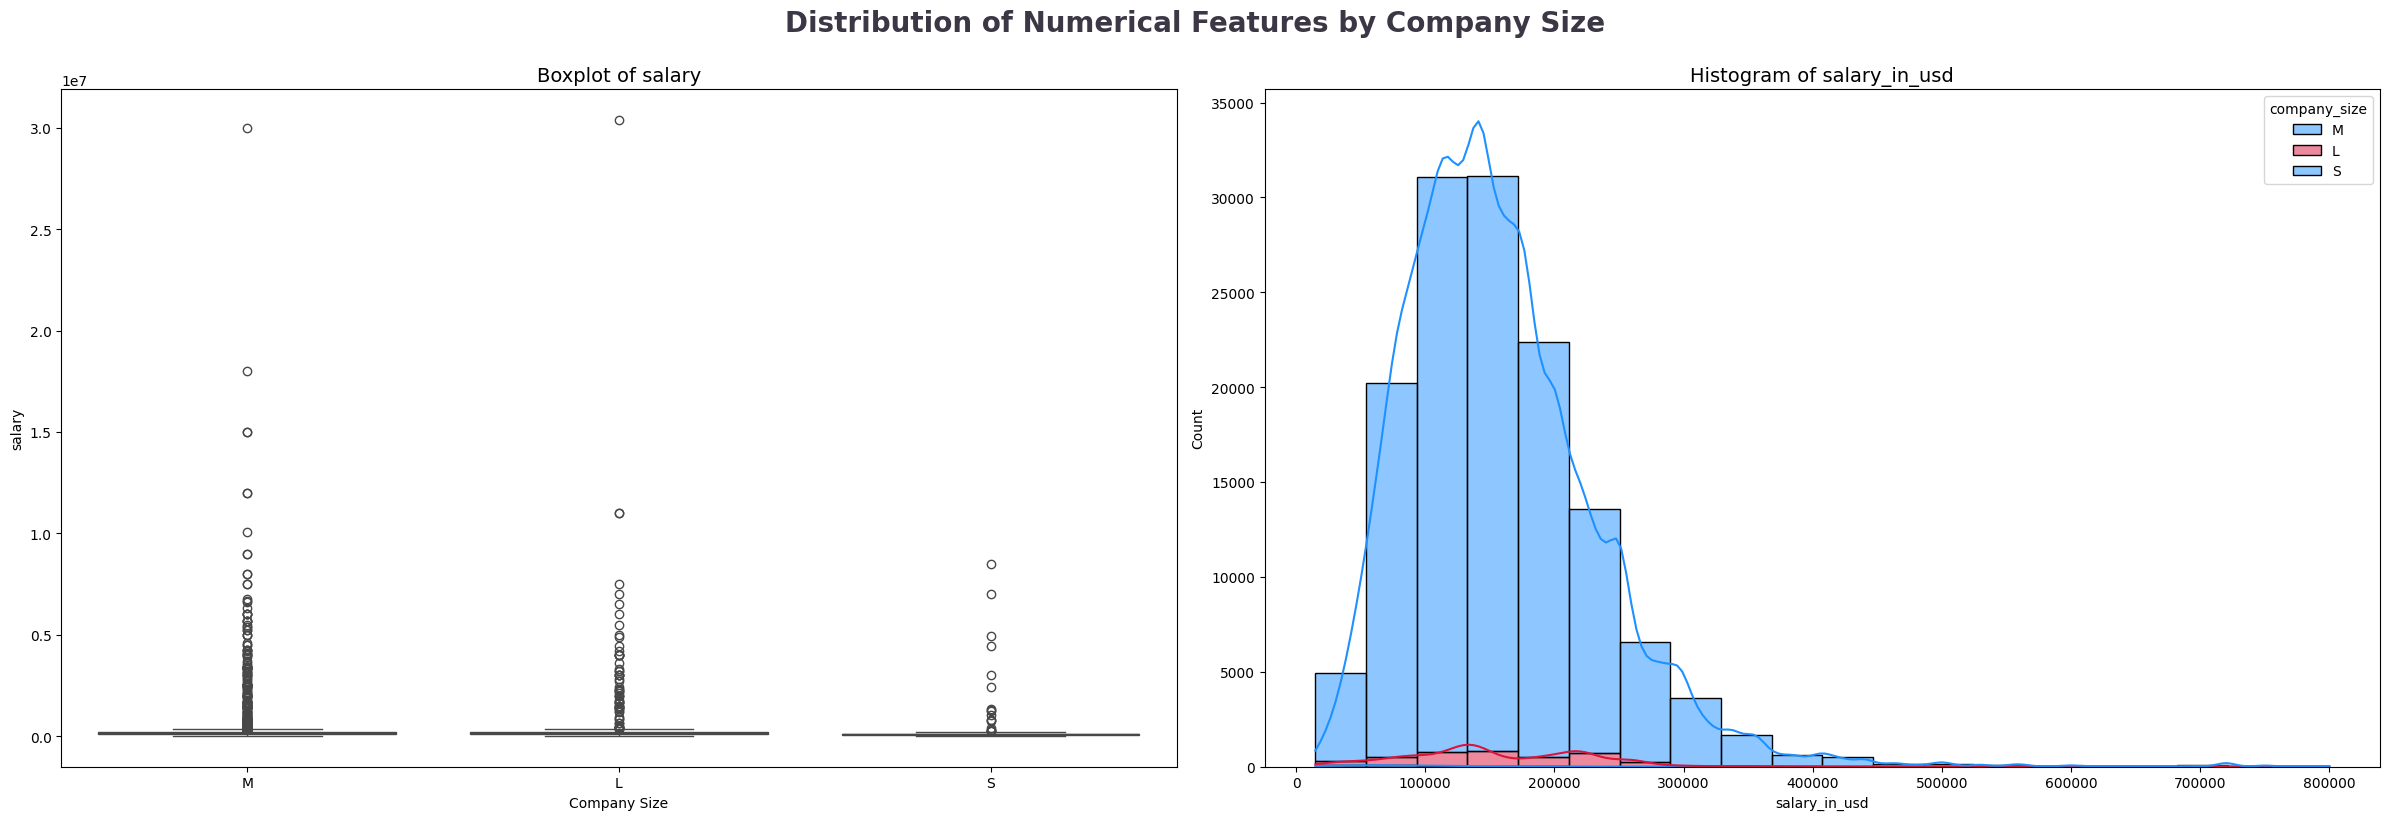

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

clr1 = ['#1E90FF', '#DC143C']
n = len(continuous_features)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(24, 8 * nrows))
fig.suptitle('Distribution of Numerical Features by Company Size',
             color='#3C3744', fontsize=20, fontweight='bold', y=1.02)

for idx, col in enumerate(continuous_features):
    row = idx // ncols
    col_idx = idx % ncols

    # left column: boxplot
    if col_idx == 0:
        ax = axes[row, 0] if nrows > 1 else axes[0]
        sns.boxplot(
            data=df,
            x='company_size',
            y=col,
            palette=clr1,
            ax=ax
        )
        ax.set_title(f'Boxplot of {col}', fontsize=14)
        ax.set_xlabel('Company Size')
        ax.set_ylabel(col)

    # right column: stacked histogram
    else:
        ax = axes[row, 1] if nrows > 1 else axes[1]
        sns.histplot(
            data=df,
            x=col,
            hue='company_size',
            bins=20,
            kde=True,
            multiple='stack',
            palette=clr1,
            ax=ax
        )
        ax.set_title(f'Histogram of {col}', fontsize=14)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')

# If there's an empty subplot (when n is odd), remove it
total_plots = nrows * ncols
if total_plots > n:
    # compute index of last empty axes
    empty_idx = n
    r = empty_idx // ncols
    c = empty_idx % ncols
    fig.delaxes(axes[r, c])

fig.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### 4 ) Visualization

#### Visualize the Target Feature

In [ ]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

First of all apply the entire process using the videos for the same dataset. And then once the pipeline is set then use your own dataset, follow the pipeline and make your very own project.